dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'Stamen', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava'])
dict_keys(['USTopo', 'USImagery', 'USImageryTopo'])
epsg:3857


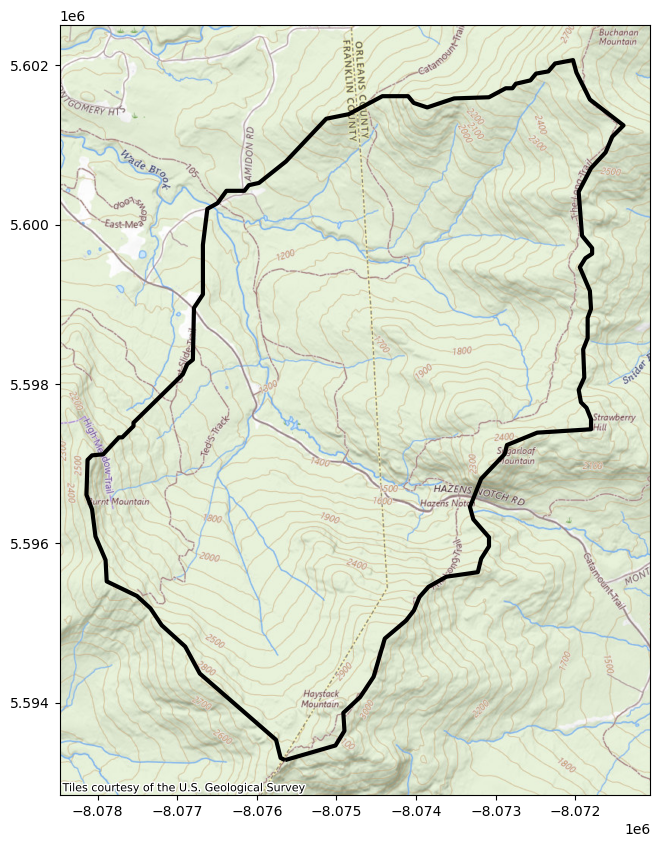

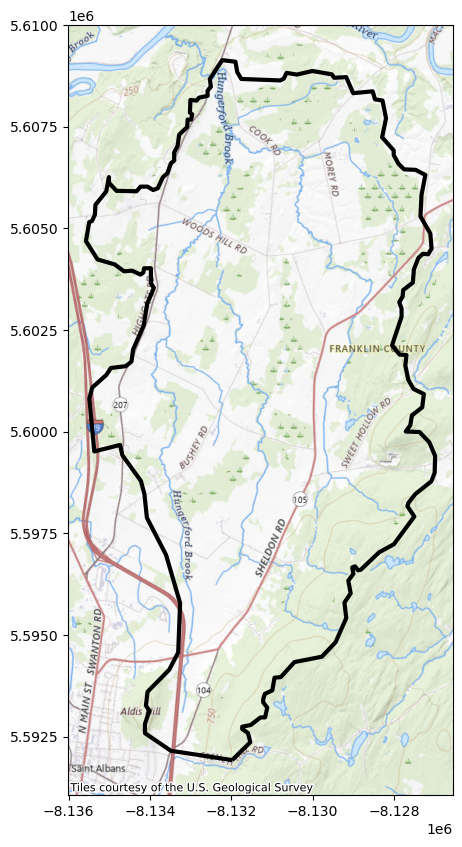

In [1]:
#####################
# READ IN LIBRARIES #
#####################

import pandas as pd  
import numpy as np  
import geopandas as gpd  
import matplotlib.pyplot as plt # plot our data and manipulate the plot
import contextily as ctx # add a default basemap under our polygons of interest
from shapely.geometry import Point, Polygon

############################
# VIEW CONTEXTILY BASEMAPS #
############################

# Using contextily for basemaps (https://dlab.berkeley.edu/news/adding-basemaps-python-contextily)
# change basemap - can be one of these
# first see available provider names

print(ctx.providers.keys())
print(ctx.providers.USGS.keys())

#####################################
# READ IN SHP FILES AND SITE COORDS #
#####################################

# Read in the shapefile of watershed polygons
wade = gpd.read_file('WadeShape/layers/WadeBrook.shp')
hungerford = gpd.read_file('HungerfordShape/layers/HungerfordShape.shp')

# Set the CRS for the geometry of the watershed polygons
# Using WGS 84 / Pseudo-Mercator (EPSG:3857)
wade_3857 = wade.to_crs(epsg=3857)
hungerford_3857 = hungerford.to_crs(epsg=3857)
print(wade_3857.crs)

# Plotting the watersheds on top of the GoogleMaps basemap

wade_poly = wade_3857.plot(facecolor="none", legend=True, linewidth=3, figsize=(10,10))
hungerford_poly = hungerford_3857.plot(facecolor="none", legend=True, linewidth=3, figsize=(10,10))
ctx.add_basemap(wade_poly, source=ctx.providers.USGS.USTopo) #add in the USGS topo basemap
ctx.add_basemap(hungerford_poly, source=ctx.providers.USGS.USTopo) #add in the basemap

# Read in Newrnet site coordinates with wells, soil sensor pits, stream sensors, 
# met stations, lysimeters (?), and groundwater wells

site_coords = pd.read_csv("newernet-site-coodinates.csv")

# Set the axis limits to zoom in on Wade sample sites:
#plt.ylim([5599000,5601000])
#plt.xlim([-8078000,-8073000]);